> "I feel the little Dijkstra in my head is pulled in two different direction." - TVD 

#### Content of this note covers the most fundamental theories behind mathematic modeling

## Numeric methods for solving a differential equation

A continuous dynamic system is modeled by a differential equation and initial condition

$$\frac{du}{dt} = f(t, u) \space \space \space \space u(t_0) = u_0$$

In this form, the function $f$ describes the slope of the tangent line to the solution $u(t)$ at the point $(t,u)$

The **order** of a numerical method is a measure of how a reduction in the step size ($h$) affects the global truncation error ($GTE$). The $GTE$ depends on the time step size $h$ as follows:

$$GTE = Ah^k$$

where $A$ is some constant, and $k$ is the order of the method. So a higher-order method (k large) is more efficient at reducing the **GTE** than a lower-order method. For example, if $h$ is reduced from by a factor of 10 (say, from 0.1 to 0.01), then the GTE is reduced by a factor of $10^k$

## Euler's Method

###### The recurrence relation:

$$u_{n+1} = u_n + hf(t_n, u_n)$$

The **order** of Euler's method is 1

Table for Eurler's Method:

$$ \frac{du}{dt} = u + 3t$$

**Timestep (h) = 1**

Timestep | Value | $f(t_n, u_n)$
--- | --- | --- 
0 | 10 | 10 + 3 * 0 = 10
1 | 10 + 1 * 10 = 20 | 20 + 3 * 1 = 23 
2 | 20 + 1 * 23 = 43 | 43 + 3 * 2 = 49
..| .. | ..

#### Implementation in Python:

<IPython.core.display.Javascript object>


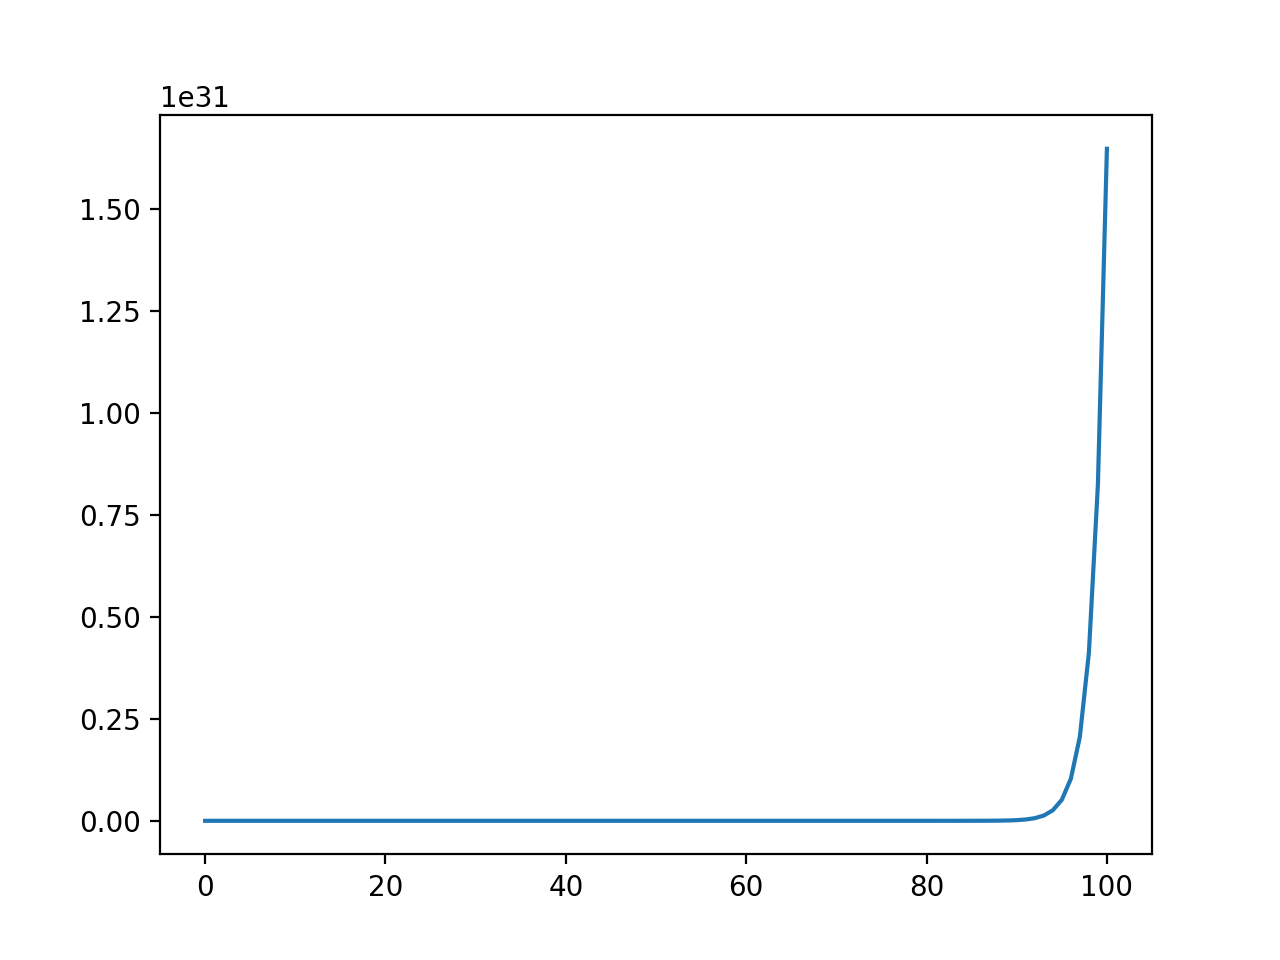

In [20]:
%matplotlib notebook
from matplotlib import pyplot as plt
### adjusting variables for different plots
# time step
h = 1 
# initial values
t_0, u_0 = 0, 10
# length of the sequence
n = 100

#update to run other differential equation
def dudt(u, t):
    return u + 3

def euler(u_n, t_n, h):
    return u_n + h * dudt(u_n,t_n)

def seq_builder(method, u_0, t_0, h):
    t_seq = [t_0 + x * h for x in range(0, n)]
    u_seq = [u_0]
    #sequentially building the model
    for i in range(0,n):
        u_seq.append(method(u_seq[i], t_seq[i], h))
    plt.plot(u_seq)
    return t_seq, u_seq

_, euler_u = seq_builder(euler, u_0, t_0, h)

## Heun's Method

###### The recurrence relation:

$$u_{n+1} = u_n + h(\frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2})$$

Since $u_{n+1}$ is unknown at this point, Heun's method uses Euler's method to estimate $u_{n+1}$ on the right side of the recurrence relation:

$$u_{n+1} = u_n + \frac{h}{2}(f(t_n, u_n)+f(t_{n+1}, u_n + hf(t_n, u_n)))$$

Heun's method is a **predictor-corrector** method, because it uses Euler's method to **predict** $u_{n+1}$, then incorporates it into a better formula that **corrects** it.

The **order** of Heun's method is **2**.

<IPython.core.display.Javascript object>


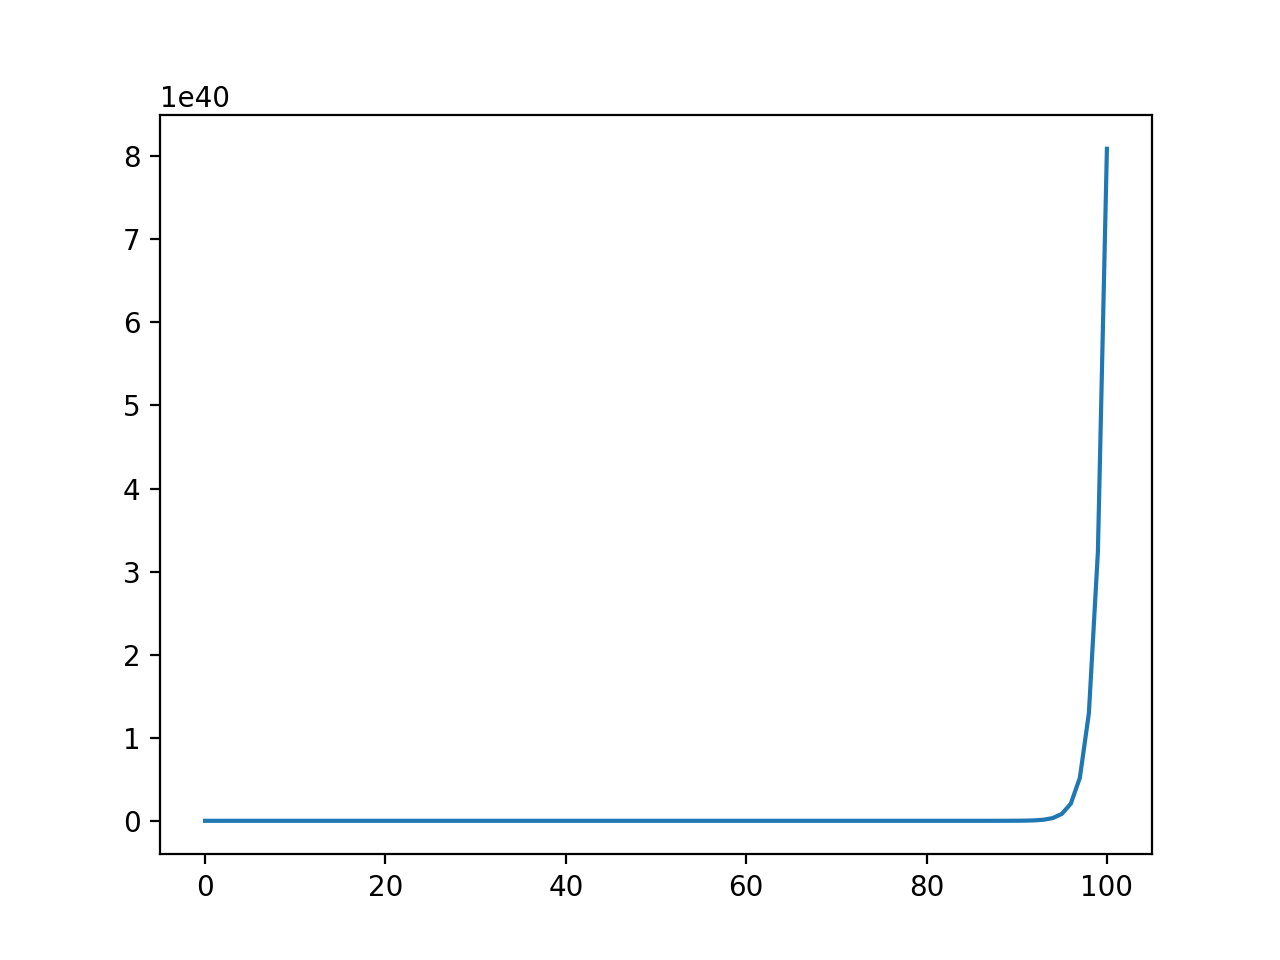

In [19]:
%matplotlib notebook
#here we assume that t_n+1 = t_n + h
def heun(u_n, t_n, h):
    return u_n + (h/2)*(dudt(u_n, t_n)+dudt(u_n + h*dudt(u_n, t_n), t_n+h))

_, heun_u = seq_builder(heun, u_0, t_0, h)

## Runge-Kutta Method

###### The recurrence relation:

Predictor slopes: 

$$s_1 = f(t_n, u_n)$$
$$s_2 = f(t_n+\frac{h}{2}, u_n+\frac{h}{2}s_1)$$
$$s_3 = f(t_n+\frac{h}{2}, u_n+\frac{h}{2}s_2)$$
$$s_4 = f(t_n+h, u_n+hs_3)$$

Weighted average:

$$u_{n+1} = u_n + h(\frac{s_1+2s_2+2s_3+s_4}{6})$$

The **order** of Runge-Kutta method is **4**.

<IPython.core.display.Javascript object>


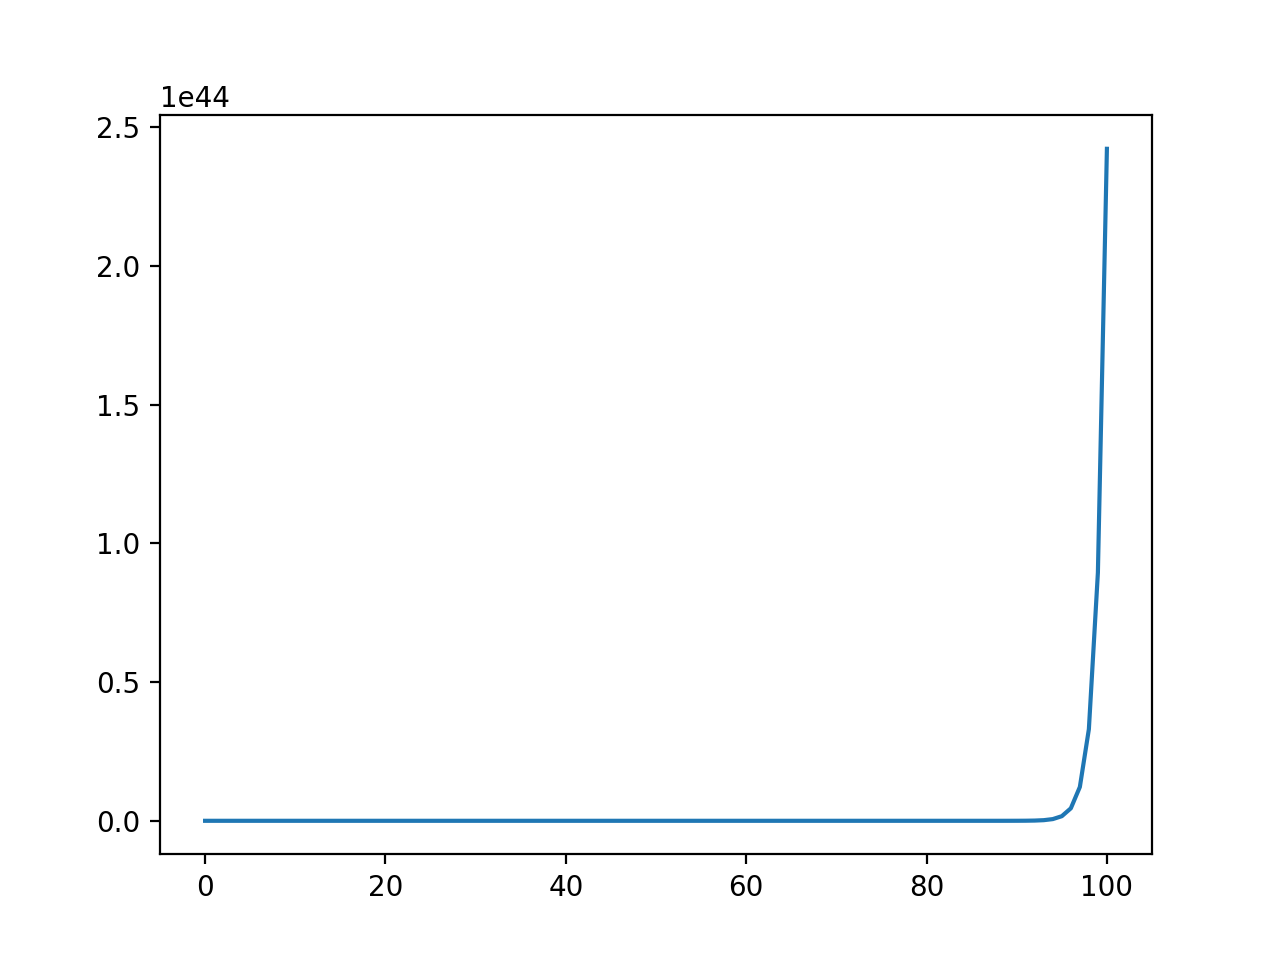

In [18]:
%matplotlib notebook
def runge_kutta(u_n, t_n, h):
    s1 = dudt(u_n, t_n)
    s2 = dudt(u_n + h/2*s1, t_n + h/2)
    s3 = dudt(u_n + h/2*s2, t_n + h/2)
    s4 = dudt(u_n + h*s3, t_n + h)
    return u_n + h*((s1 + 2*s2 + 2*s3 + s4)/6)

_, runge_kutta_u = seq_builder(runge_kutta, u_0, t_0, h)

# Phase Portrait